Build a regression model.

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
citybikes_df = pd.read_csv('/Users/Oswal/Documents/GitHub/Project-Week-3/data/Toulouse_Data.csv')

In [3]:
city_yelp_df = pd.read_csv('/Users/Oswal/Documents/GitHub/Project-Week-3/data/city_yelp_data.csv')

In [4]:
city_foursquare_df = pd.read_csv('/Users/Oswal/Documents/GitHub/Project-Week-3/data/city_foursquare_data.csv')

In [5]:
city_yelp_df.head()

,name,country,city,categories,review_count,rating,near_station,Address,empty_slots,free_bikes,latitude,longitude,timestamp,Unique ID
0,De Danú,FR,Toulouse,"[{'alias': 'irish_pubs', 'title': 'Irish Pub'}]",84,4.0,00197 - CASERNE PERIGNON,6 AV LOUIS BLERIOT,19,1,43.600386,1.464094,2022-12-05T00:29:57.070000Z,197
1,La Dynamo,FR,Toulouse,"[{'alias': 'danceclubs', 'title': 'Dance Clubs...",31,4.5,00197 - CASERNE PERIGNON,6 AV LOUIS BLERIOT,19,1,43.600386,1.464094,2022-12-05T00:29:57.070000Z,197
2,Au Poêle de la Bête,FR,Toulouse,"[{'alias': 'tapas', 'title': 'Tapas Bars'}, {'...",18,4.5,00197 - CASERNE PERIGNON,6 AV LOUIS BLERIOT,19,1,43.600386,1.464094,2022-12-05T00:29:57.070000Z,197
3,L'Heure du Singe,FR,Toulouse,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",17,4.5,00197 - CASERNE PERIGNON,6 AV LOUIS BLERIOT,19,1,43.600386,1.464094,2022-12-05T00:29:57.070000Z,197
4,Puerto Habana,FR,Toulouse,"[{'alias': 'tapasmallplates', 'title': 'Tapas/...",33,3.5,00197 - CASERNE PERIGNON,6 AV LOUIS BLERIOT,19,1,43.600386,1.464094,2022-12-05T00:29:57.070000Z,197


In [6]:
city_foursquare_df.head()

,name,country,categories,near_station,Address,empty_slots,free_bikes,latitude,longitude,timestamp,Unique ID
0,De Danu,FR,"[{'id': 13006, 'name': 'Beer Bar', 'icon': {'p...",00197 - CASERNE PERIGNON,6 AV LOUIS BLERIOT,19,1,43.600386,1.464094,2022-12-05T00:29:57.070000Z,197
1,De Danu,FR,"[{'id': 13006, 'name': 'Beer Bar', 'icon': {'p...",00213 - PUJOL - CHAUBET,129 AV DE CASTRES,16,1,43.600755,1.467514,2022-12-05T00:29:57.109000Z,213
2,Les Délices de Saturnin,FR,"[{'id': 13035, 'name': 'Coffee Shop', 'icon': ...",00055 - SAINT-SERNIN - G. ARNOULT,2 RUE GATIEN ARNOULT,4,11,43.608952,1.441004,2022-12-05T00:29:56.992000Z,55
3,De Danu,FR,"[{'id': 13006, 'name': 'Beer Bar', 'icon': {'p...",00195 - LARROUSSE - RIEUX,FACE 15 RUE PIERRE LAROUSSE,13,5,43.597235,1.459071,2022-12-05T00:29:56.994000Z,195
4,Le Samourai,FR,"[{'id': 13003, 'name': 'Bar', 'icon': {'prefix...",00280 - CHARBONNIERE,RUE DE LA CHARBONNIERE ENTRE IMP AMPERE ET RUE...,8,10,43.573830,1.448710,2022-12-05T00:29:56.996000Z,280


Provide model output and an interpretation of the results. 

In [18]:
x =  city_yelp_df["empty_slots"]
y = city_yelp_df["review_count"]

x = sm.add_constant(x)
lin_reg = sm.OLS(y,x)
model = lin_reg.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           review_count   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.466
Date:                Sun, 11 Dec 2022   Prob (F-statistic):              0.120
Time:                        13:21:22   Log-Likelihood:                -476.65
No. Observations:                 100   AIC:                             957.3
Df Residuals:                      98   BIC:                             962.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.7500      6.223      6.066      

# Analysis
###  We can see that the R-squared value in this data is 0.025. This would mean that the data does not have a great fit of the model. Generally speaking, this indicates that the model is not representative of the data or that the model does not accurately explain the trend/pattern of the data. 

### In our p-value we can note wheter the results of the model are statistically significant. Since our p-value is greater than 0.05 (p-value = 0.120), this means that the probability that our variables our are causative. In our case, we can say that the amount of reviews for a venue does not impact the amount free-bikes that are found at the nearest bike station. 

<AxesSubplot: xlabel='review_count', ylabel='free_bikes'>

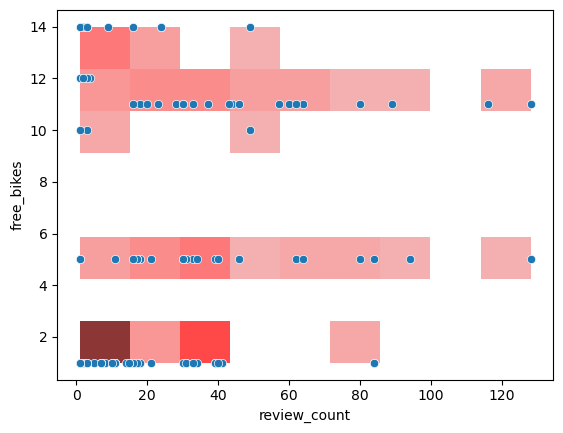

In [17]:
sns.histplot(city_yelp_df, x='review_count', y='free_bikes', color='red')
sns.scatterplot(data = city_yelp_df, x='review_count', y='free_bikes')

# Stretch

How can you turn the regression model into a classification model?